# IMPORTING LIBRARIES

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import missingno
import matplotlib.pyplot as plt

# Import Data

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving netflix_titles.csv to netflix_titles (1).csv


In [ ]:
df = pd.read_csv('netflix_titles.csv')
df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [ ]:
# Let's Look The Dimensions Of The Data:
print(f'The Data-Set Contain {df.shape[0]} Rows and {df.shape[1]} Columns')

The Data-Set Contain 7787 Rows and 12 Columns


# Data Types

In [ ]:
#Check Data Types
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

# Missing values

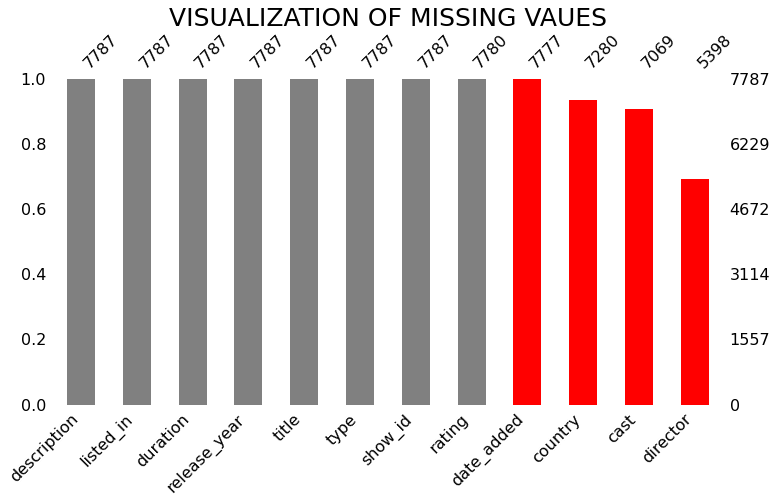

In [ ]:
color = ['grey','grey','grey','grey','grey','grey','grey','grey','red','red','red','red']
missingno.bar(df,fontsize =16, color = color, sort = 'descending', figsize = (12,6))
plt.title("VISUALIZATION OF MISSING VAUES",fontsize=25)
plt.show()

# Most of the Values are Missing From Director Column and some of in Cast,Country and Date column

Let's impute the missing values:

In [ ]:
# handling missing values
df['director'] = df['director'].fillna('NoDataAvailable')
df['country'] = df['country'].fillna(df['country'].mode()[0])
df['cast'] = df['cast'].fillna('NoDataAvailable')
df['date_added'] = df['date_added'].fillna(df['date_added'].mode()[0])
df['rating'] = df['rating'].fillna(df['rating'].mode()[0])
print('count of values')
print(df.isna().sum())

count of values
show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64


# Duplicate Values:

In [ ]:
df.duplicated().sum()

0

# **Exploratory Data Analysis**

There are 12 features in dataset, data is mostly included with categorical data. Expected outcome from this EDA is to analyze some trends, tops bottoms of the data.Crucial part of this analysis chronological inputs, so it's better to convert some data frame columns to datetime format to extract month, year data from given crude data. 


In [ ]:
df["year"]=pd.DatetimeIndex(df["date_added"]).year
df["month"]=pd.DatetimeIndex(df["date_added"]).month
ratings_ages = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}
df["ratings_ages"]=df["rating"].replace(ratings_ages)

In [ ]:
df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year,month,ratings_ages
0,s1,TV Show,3%,NoDataAvailable,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,8,Adults
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,12,Adults
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,12,Adults
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017,11,Teens
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020,1,Teens


# *Netflix Content Analysis* 

In [ ]:
x=df["type"].value_counts().reset_index()
px.pie(x,values="type",names="index")

#                    So 69.1% content is Movies and 30.9% Content is Tv-shows:





# Netflix Content Country wise Analysis

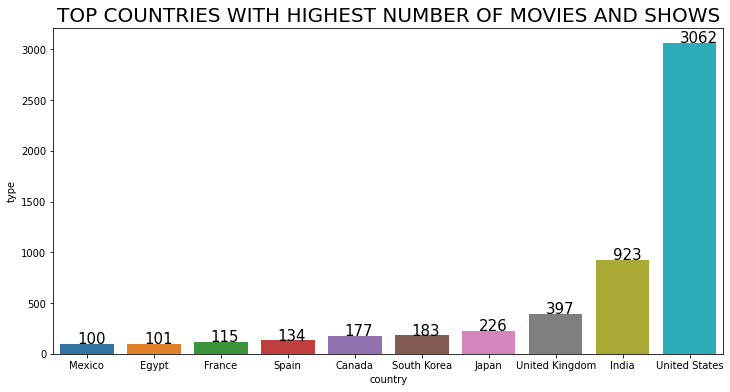

In [ ]:
countries=pd.crosstab(df["country"],["type"]).sort_values(by="type",ascending=True)[-10:].reset_index()
plt.figure(figsize=(12,6))
ax=sns.barplot(x=countries["country"],y=countries["type"] )
plt.title("TOP COUNTRIES WITH HIGHEST NUMBER OF MOVIES AND SHOWS",fontsize=20)
for i in ax.patches:
    ax.text(i.get_x()+.25,i.get_height()+2.3,str(int((i.get_height()))),
            rotation=0,fontsize=15,color='black')

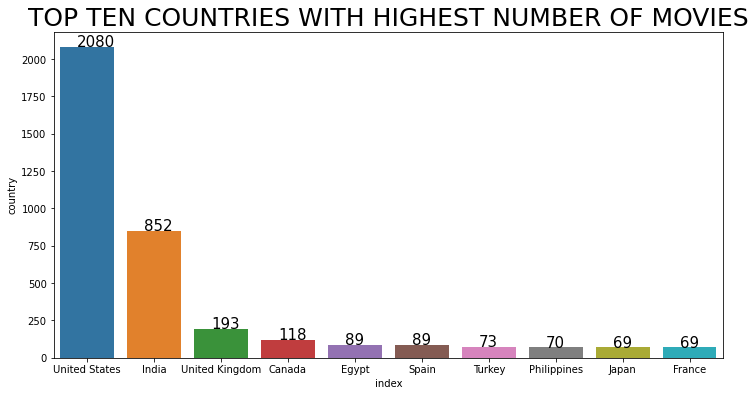

In [ ]:
m=df[df["type"]=="Movie"]
movies=m["country"].value_counts().reset_index()[0:10]
plt.figure(figsize=(12,6))
plt.title("TOP TEN COUNTRIES WITH HIGHEST NUMBER OF MOVIES",fontsize=25)
ax=sns.barplot(x=movies["index"],y=movies["country"])
for i in ax.patches:
    ax.text(i.get_x()+.25,i.get_height()+2.3,str(int((i.get_height()))),
            rotation=0,fontsize=15,color='black')

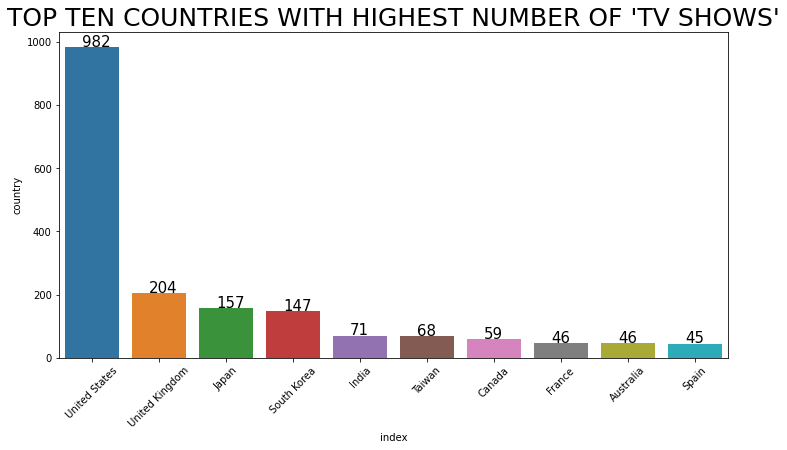

In [ ]:
m=df[df["type"]=='TV Show']
movies=m["country"].value_counts().reset_index()[0:10]
plt.figure(figsize=(12,6))
plt.title("TOP TEN COUNTRIES WITH HIGHEST NUMBER OF 'TV SHOWS'",fontsize=25)
ax=sns.barplot(x=movies["index"],y=movies["country"])
plt.xticks(rotation =45)
for i in ax.patches:
    ax.text(i.get_x()+.25,i.get_height()+2.3,str(int((i.get_height()))),
            rotation=0,fontsize=15,color='black')

# US has the highest number of Content Available






# **Netflix Time Series Analysis**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



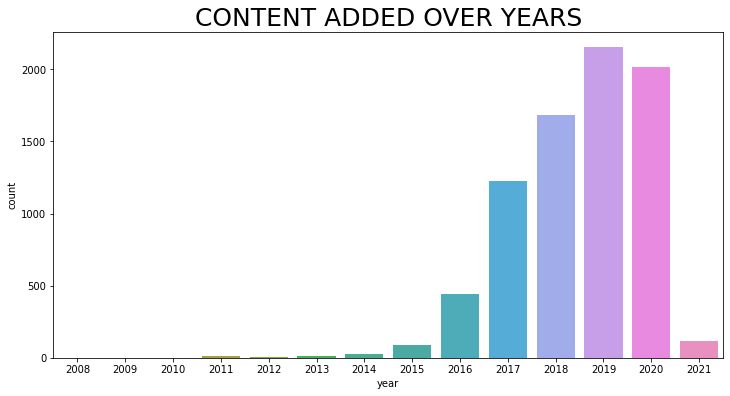

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(df["year"])
plt.title("CONTENT ADDED OVER YEARS",fontsize=25)
plt.show()

# Year 2019 Most of the Movies and Tv shows were Added. Then it Decreases May be the reason of Corona:

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



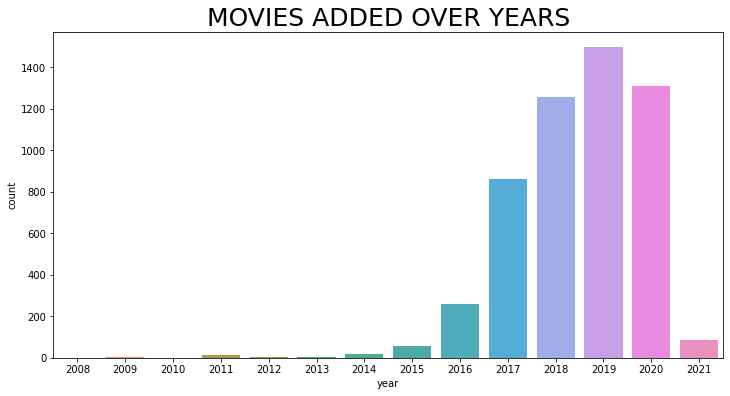

In [ ]:
c=df[df["type"]=="Movie"]
plt.figure(figsize=(12,6))
sns.countplot(c["year"])
plt.title("MOVIES ADDED OVER YEARS",fontsize=25)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



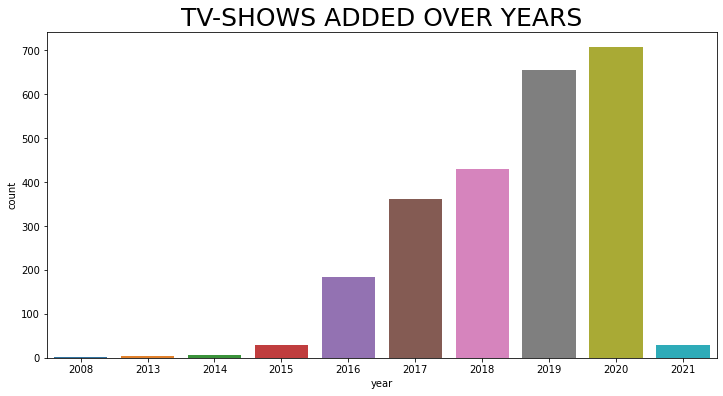

In [ ]:
T=df[df["type"]=="TV Show"]
plt.figure(figsize=(12,6))
sns.countplot(T["year"])
plt.title("TV-SHOWS ADDED OVER YEARS",fontsize=25)
plt.show()

# Year 2019 Most of the Movies were Added.And in year 2020 Most of the Tv-Shows were added:

# **Netflix Rating Analysis**

In [ ]:
px.pie(df,names="ratings_ages",values=df.index, title="Mostly primary audience of the netflix are adutls and they are producing most of the content \nfor them followed by other three")

In [ ]:
movies=df[df["type"]=="Movie"]
tv=df[df["type"]=="TV Show"]

In [ ]:
px.pie(movies,names="ratings_ages",values=movies.index,title="Type of content present in movies")

In [ ]:
px.pie(tv,names="ratings_ages",values=tv.index,title="Type of content present in Tv shows")


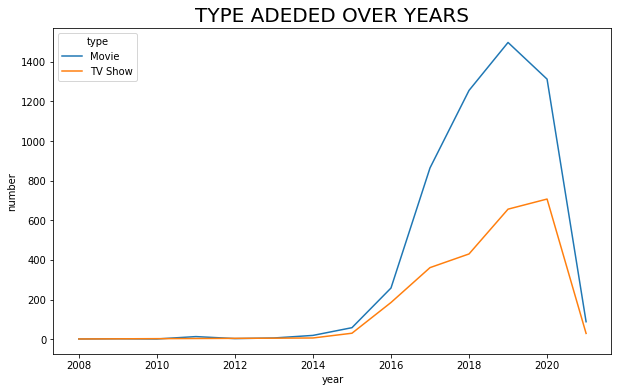

In [ ]:
new=df[["type","year"]].value_counts().reset_index()
new.columns=["type","year","number"]
new
plt.figure(figsize=(10,6))
sns.lineplot(data=new,x="year",y="number",hue="type")
plt.title("TYPE ADEDED OVER YEARS",fontsize=20)
plt.show()

# RECOMMENDATION SYSTEM:
  ## Content Based Recommendation System 

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
# instantiate the vectorizer object and  removing stopwords
tfidf = TfidfVectorizer(stop_words='english')

#Replace NaN with an empty string
df['description'] = df['description'].fillna('')

#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(df['description'])

#Output the shape of tfidf_matrix
tfidf_matrix.shape

(7787, 17905)

In [ ]:
from sklearn.metrics.pairwise import linear_kernel

# Compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [ ]:
indices = pd.Series(df.index, index=df['title']).drop_duplicates()

In [ ]:
def get_recommendations(title, cosine_sim=cosine_sim):
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    print('Top 10 Recommendations for you because you liked :', title)
    # Return the top 10 most similar movies
    return df['title'].iloc[movie_indices]

In [ ]:
get_recommendations('Lucifer')

Top 10 Recommendations for you because you liked : Lucifer


960                            Black Rose
5194                 Rica, Famosa, Latina
1302                                 Chef
5993                          Taxi Ballad
2594    Handsome: A Netflix Mystery Movie
431                   Along Came a Spider
7440                        Vodka Diaries
791                    Beauty & the Beast
1147                        Burning Sands
2596                              Hangman
Name: title, dtype: object